# Premier League Player Stats

In [310]:
import pandas as pd
ps=pd.read_csv('D:/DataScience/Datas/PremierLeague/player_stats.csv')
ps.head()

,Name,Twitter,Instagram,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,...,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Facebook
0,Max Aarons,https://twitter.com/maxaarons2,https://www.instagram.com/maxaarons2/,90.0,0.0,12.0,62.0,10.0,174.0,141.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zach Abbott,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Terry Ablade,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Josh Acheampong,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tyler Adams,https://www.instagram.com/tyler.adams/,NaN,3.0,0.0,2.0,1.0,NaN,NaN,4.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
po=pd.read_csv('D:/DataScience/Datas/PremierLeague/player_overview.csv')
po.head()

,Name,Nationality,Date of Birth,Height,Club,Position,Appearances,Goals,Assists,Clean sheets,Facebook
0,Max Aarons,England,04/01/2000 (24),178cm,Bournemouth,Defender,90.0,0.0,4.0,10.0,NaN
1,Zach Abbott,England,13/05/2006 (18),NaN,Nottingham Forest,Defender,0.0,0.0,0.0,0.0,NaN
2,Terry Ablade,Finland,12/10/2001,NaN,NaN,Forward,0.0,0.0,0.0,NaN,NaN
3,Josh Acheampong,England,05/05/2006 (18),NaN,Chelsea,Defender,1.0,0.0,0.0,0.0,NaN
4,Tyler Adams,United States,14/02/1999 (25),173cm,Bournemouth,Midfielder,27.0,0.0,0.0,NaN,NaN


In [5]:
ps=ps.drop(columns=['Twitter','Instagram','Facebook'])

In [312]:
dup1=ps[ps.duplicated()]
ps = ps.drop_duplicates()


In [8]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 0 to 1003
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    930 non-null    object 
 1   Appearances             930 non-null    float64
 2   Goals                   930 non-null    float64
 3   Wins                    930 non-null    float64
 4   Losses                  930 non-null    float64
 5   Clean sheets            399 non-null    float64
 6   Goals Conceded          399 non-null    float64
 7   Tackles                 817 non-null    float64
 8   Tackle success %        603 non-null    object 
 9   Last man tackles        286 non-null    float64
 10  Blocked shots           817 non-null    float64
 11  Interceptions           817 non-null    float64
 12  Clearances              817 non-null    float64
 13  Headed Clearance        817 non-null    float64
 14  Clearances off line     286 non-null    float6

In [10]:
dl1=po[po.duplicated()]
dl1
po=po.drop_duplicates()

In [11]:
po.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 0 to 1002
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           930 non-null    object 
 1   Nationality    930 non-null    object 
 2   Date of Birth  930 non-null    object 
 3   Height         741 non-null    object 
 4   Club           460 non-null    object 
 5   Position       930 non-null    object 
 6   Appearances    926 non-null    float64
 7   Goals          926 non-null    float64
 8   Assists        926 non-null    float64
 9   Clean sheets   398 non-null    float64
 10  Facebook       0 non-null      float64
dtypes: float64(5), object(6)
memory usage: 87.2+ KB


In [12]:
po_filter=po.loc[:,['Name', 'Position']]
po_filter

,Name,Position
0,Max Aarons,Defender
1,Zach Abbott,Defender
2,Terry Ablade,Forward
3,Josh Acheampong,Defender
4,Tyler Adams,Midfielder
...,...,...
968,Adam Lallana,Midfielder
975,Harry Maguire,Defender
1000,Junior Stanislas,Midfielder
1001,Raheem Sterling,Forward


______________________________________________________________________________________________________________________________________________________
Explanation:
on='ID': Specifies the column to merge on (the primary key).

how='inner': This specifies the type of join:
* 'inner': Only include rows with keys that are present in both DataFrames.
* 'left': Include all rows from df1 and matching rows from df2.
* 'right': Include all rows from df2 and matching rows from df1.
* 'outer': Include all rows from both DataFrames, filling in NaN for missing matches.

In [14]:
aps=pd.merge(ps,po_filter,on='Name', how='inner')

In [15]:
aps.head()

,Name,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Tackle success %,Last man tackles,...,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Position
0,Max Aarons,90.0,0.0,12.0,62.0,10.0,174.0,141.0,66%,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Defender
1,Zach Abbott,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0%,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Defender
2,Terry Ablade,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forward
3,Josh Acheampong,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0%,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Defender
4,Tyler Adams,3.0,0.0,2.0,1.0,NaN,NaN,4.0,75%,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Midfielder


In [16]:
aps = aps.drop(aps[aps['Appearances'] == 0].index)

In [17]:
dup2=aps[aps.duplicated()]
aps=aps.drop_duplicates()

In [18]:
aps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 0 to 930
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    475 non-null    object 
 1   Appearances             475 non-null    float64
 2   Goals                   475 non-null    float64
 3   Wins                    475 non-null    float64
 4   Losses                  475 non-null    float64
 5   Clean sheets            190 non-null    float64
 6   Goals Conceded          190 non-null    float64
 7   Tackles                 439 non-null    float64
 8   Tackle success %        318 non-null    object 
 9   Last man tackles        154 non-null    float64
 10  Blocked shots           439 non-null    float64
 11  Interceptions           439 non-null    float64
 12  Clearances              439 non-null    float64
 13  Headed Clearance        439 non-null    float64
 14  Clearances off line     154 non-null    float64

In [19]:
cg=aps.select_dtypes(include='float64')
cg

,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Last man tackles,Blocked shots,Interceptions,...,Shots on target,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
0,90.0,0.0,12.0,62.0,10.0,174.0,141.0,1.0,13.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,0.0,2.0,1.0,NaN,NaN,4.0,NaN,0.0,4.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20.0,2.0,8.0,8.0,6.0,25.0,21.0,0.0,2.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,27.0,10.0,5.0,16.0,NaN,NaN,4.0,NaN,7.0,6.0,...,14.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,25.0,0.0,7.0,8.0,NaN,NaN,8.0,NaN,3.0,3.0,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,22.0,2.0,11.0,7.0,4.0,29.0,24.0,0.0,5.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,4.0,0.0,1.0,1.0,NaN,NaN,0.0,NaN,0.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
929,31.0,8.0,13.0,11.0,NaN,NaN,21.0,NaN,14.0,13.0,...,22.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=cg.corr()
g=corr[corr>0.8]

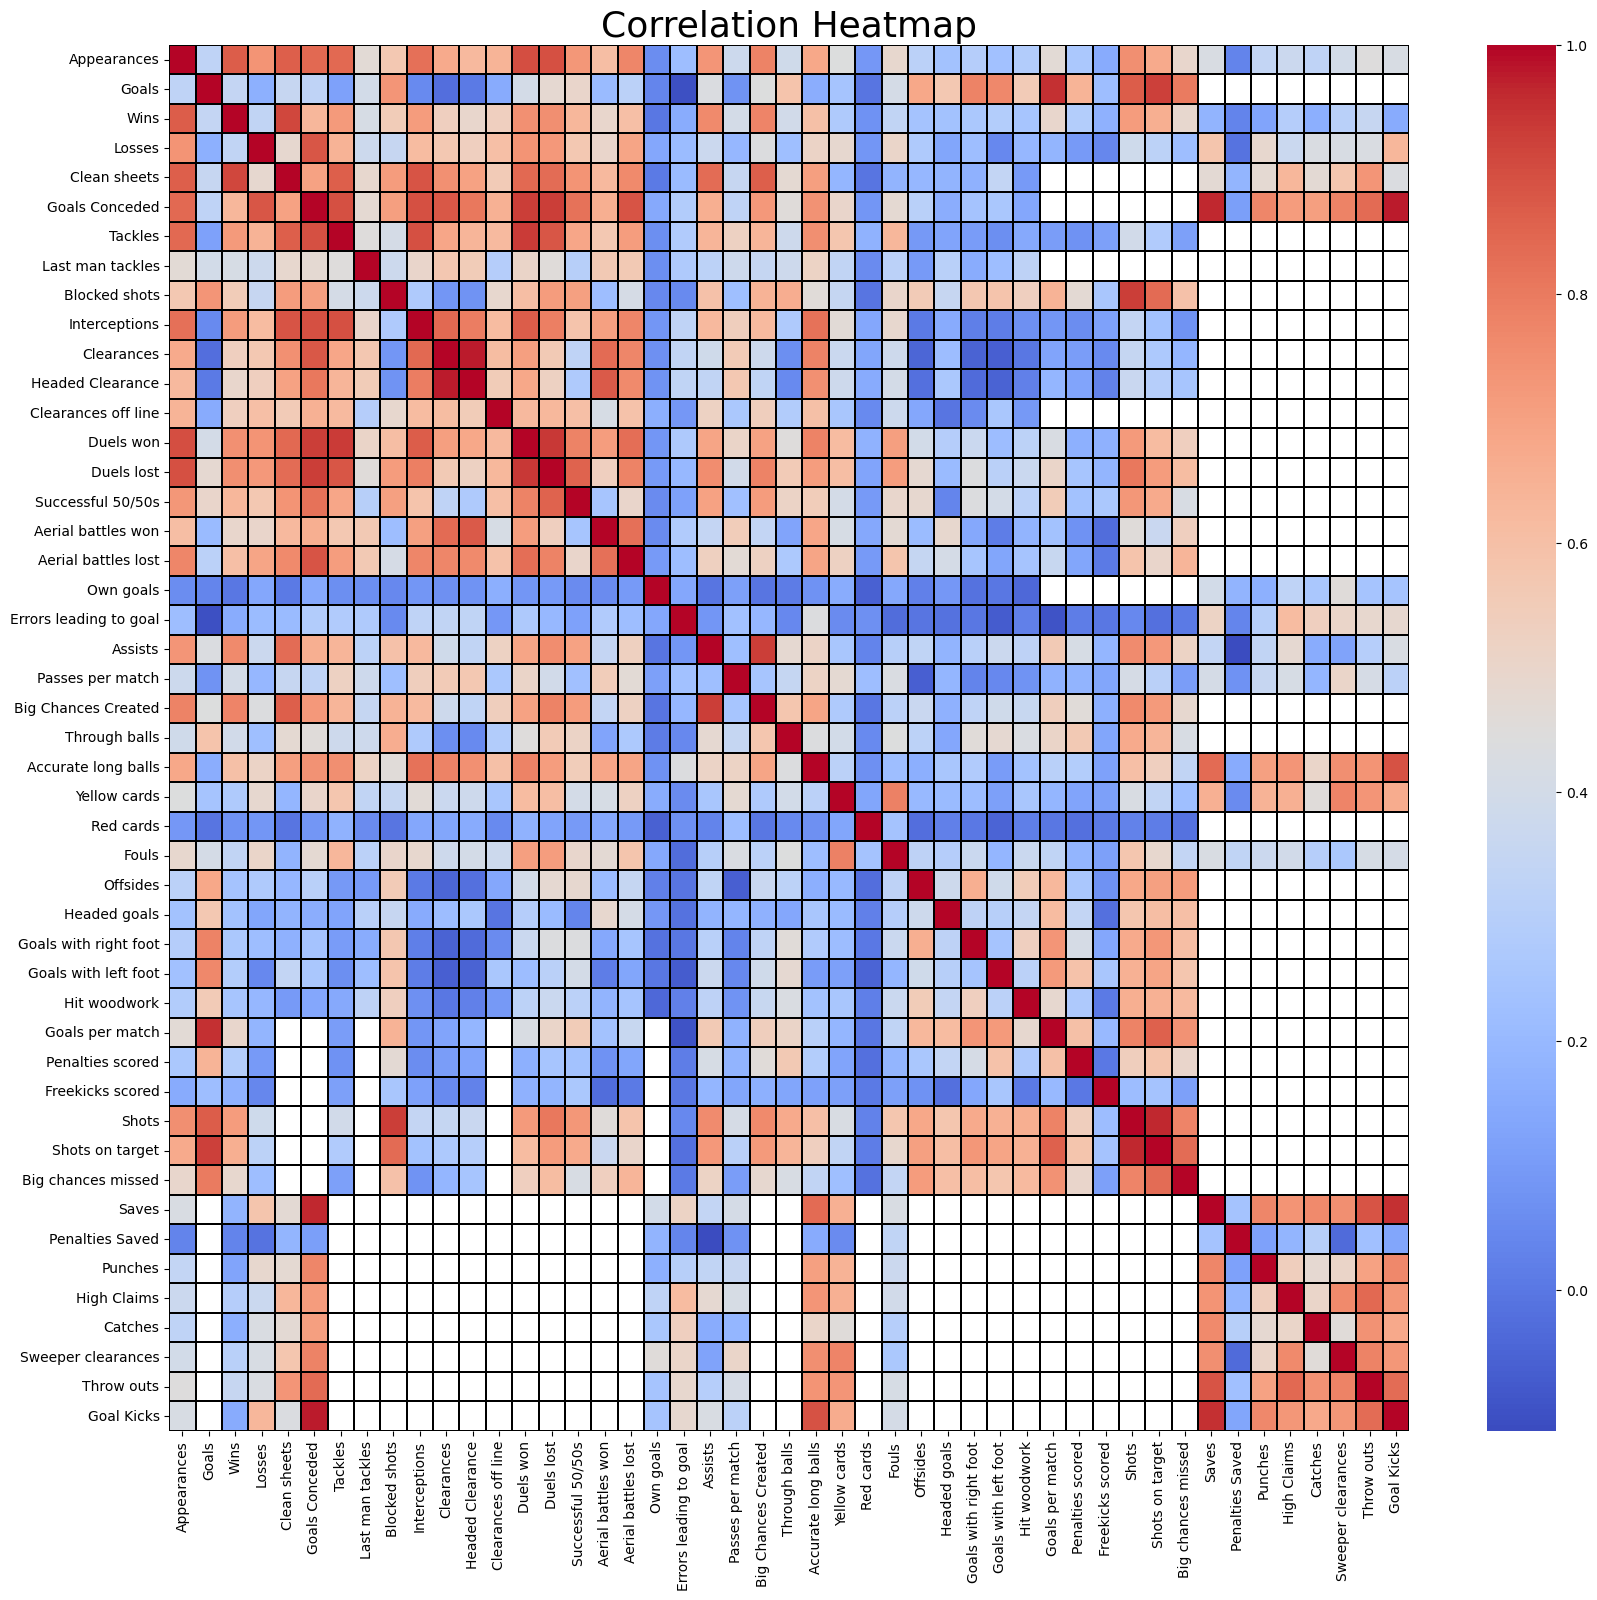

In [321]:
plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=False, cmap='coolwarm',linewidth=0.1,linecolor='black')

plt.title('Correlation Heatmap', fontsize=26)
plt.show()

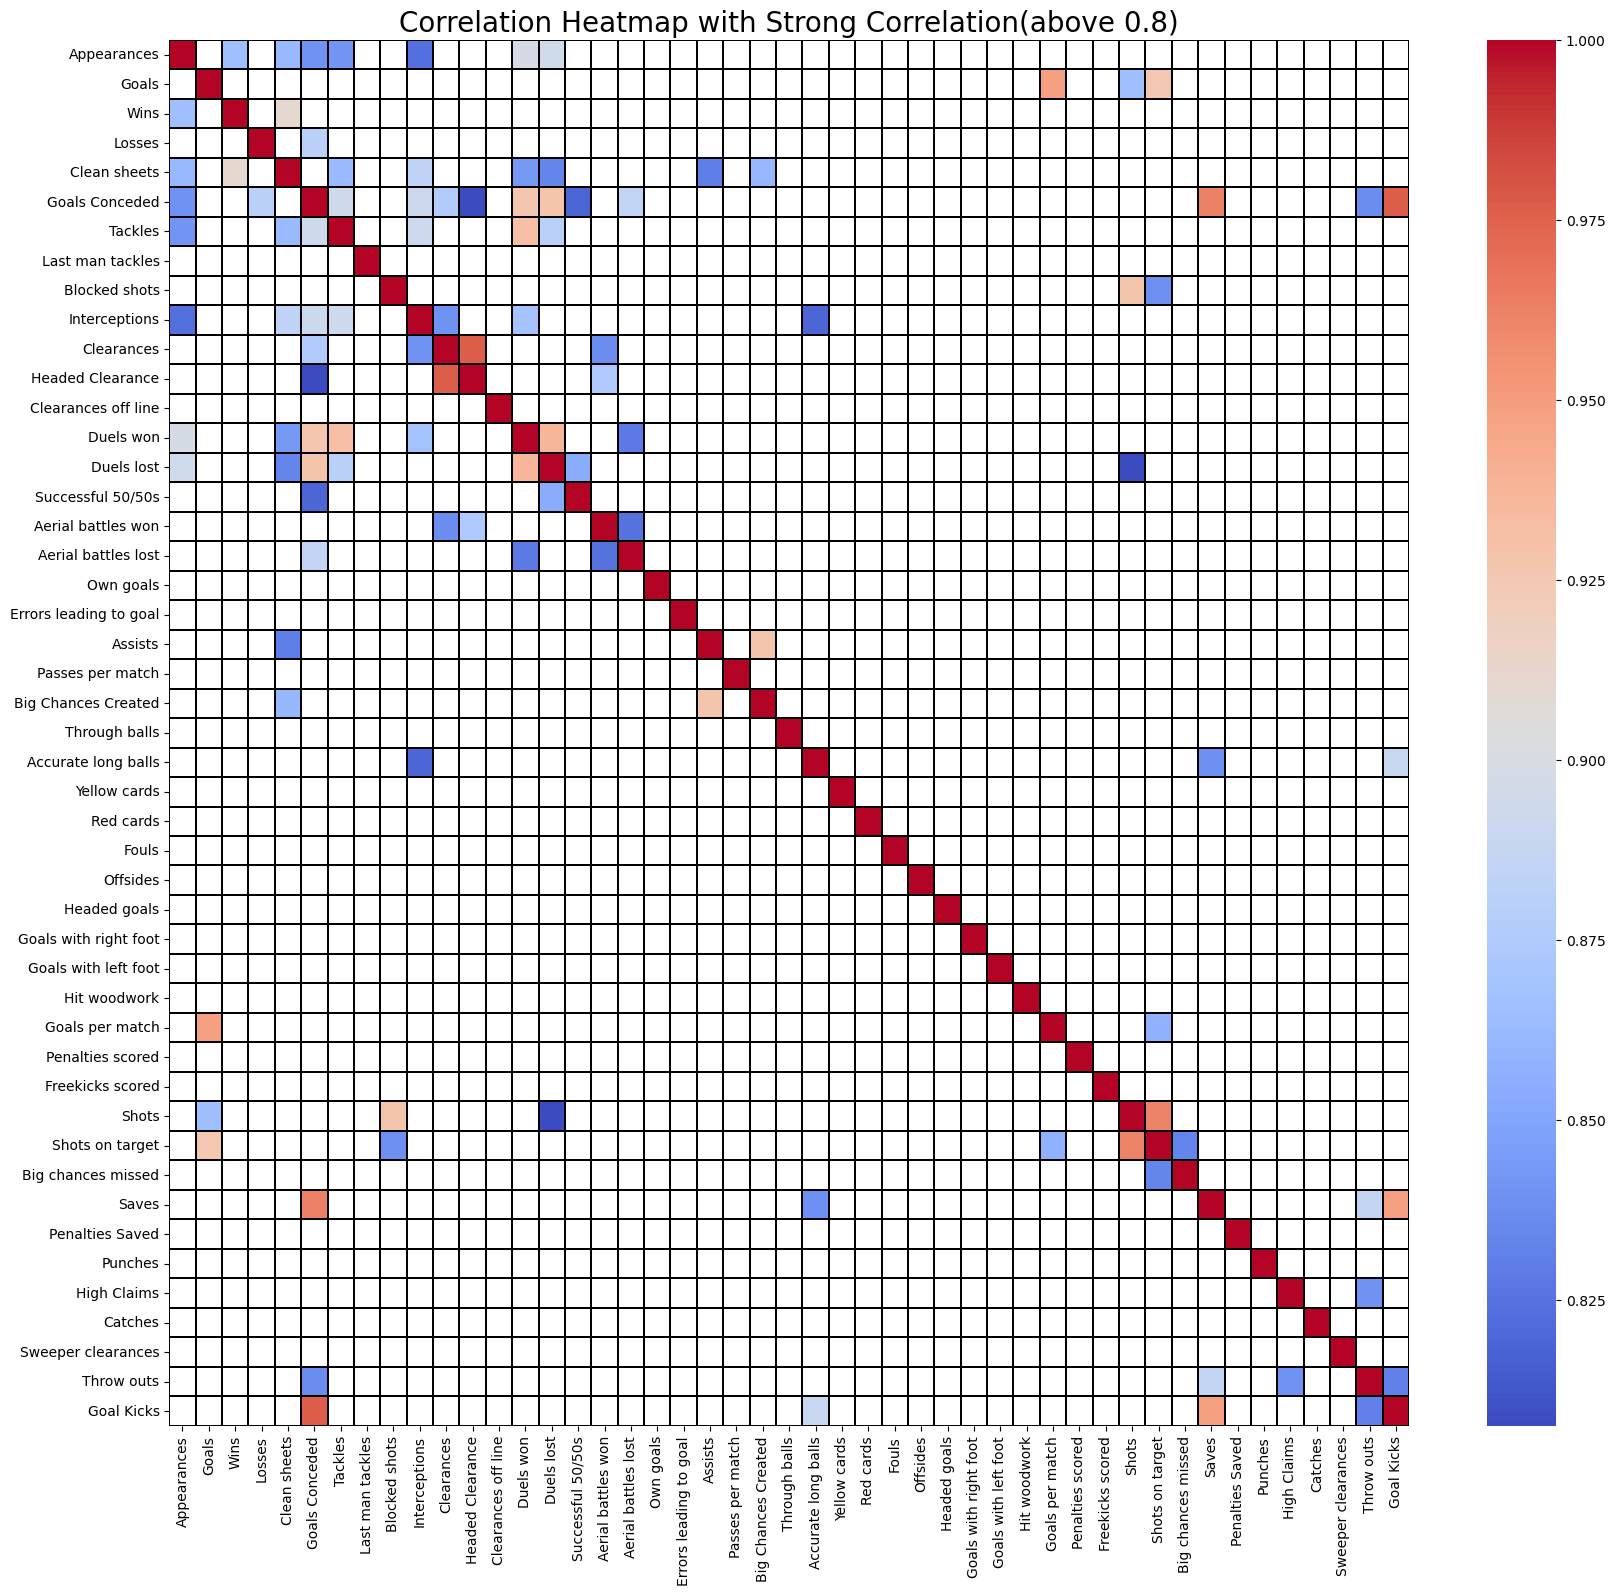

In [319]:
plt.figure(figsize=(20, 18))
sns.heatmap(g, annot=False, cmap='coolwarm',linewidth=0.1,linecolor='black')

# Set axis labels and title
#plt.xlabel('Features', fontsize=14)
#plt.ylabel('Features', fontsize=14)
plt.title('Correlation Heatmap with Strong Correlation(above 0.8)', fontsize=20)
plt.show()

## **Outliers** ***(using IQR method)***

<Axes: xlabel='Wins'>

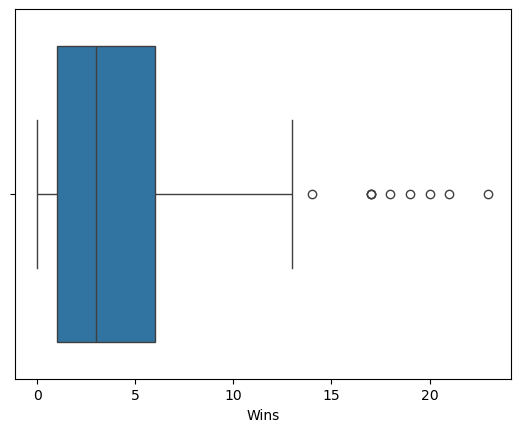

In [340]:
sns.boxplot(x=aps['Wins'])

<Axes: xlabel='Losses'>

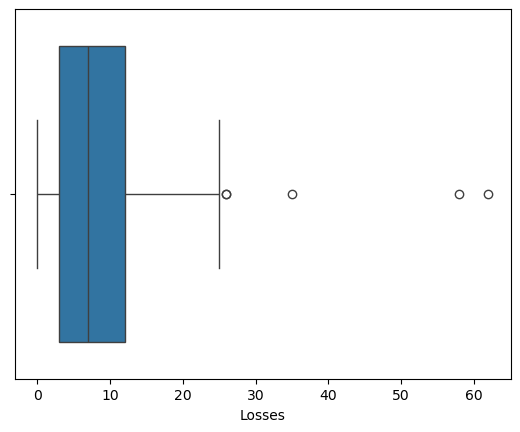

In [26]:
sns.boxplot(x=aps['Losses'])

<Axes: xlabel='Appearances'>

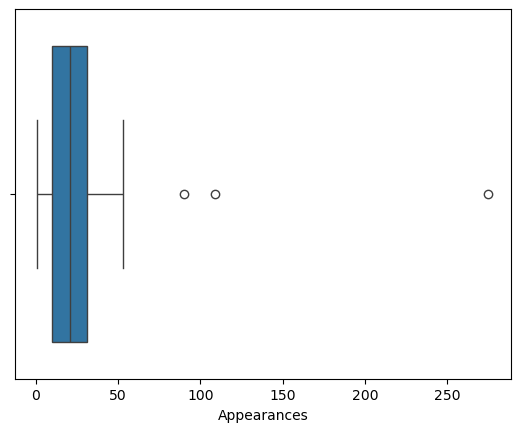

In [27]:
sns.boxplot(x=aps['Appearances'])

In [28]:
cg=aps.select_dtypes(include='float64')
cg

,Appearances,Goals,Wins,Losses,Clean sheets,Goals Conceded,Tackles,Last man tackles,Blocked shots,Interceptions,...,Shots on target,Big chances missed,Saves,Penalties Saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks
0,90.0,0.0,12.0,62.0,10.0,174.0,141.0,1.0,13.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,0.0,2.0,1.0,NaN,NaN,4.0,NaN,0.0,4.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20.0,2.0,8.0,8.0,6.0,25.0,21.0,0.0,2.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,27.0,10.0,5.0,16.0,NaN,NaN,4.0,NaN,7.0,6.0,...,14.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,25.0,0.0,7.0,8.0,NaN,NaN,8.0,NaN,3.0,3.0,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,22.0,2.0,11.0,7.0,4.0,29.0,24.0,0.0,5.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,4.0,0.0,1.0,1.0,NaN,NaN,0.0,NaN,0.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
929,31.0,8.0,13.0,11.0,NaN,NaN,21.0,NaN,14.0,13.0,...,22.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
Q1 = cg.quantile(0.25)
Q3 = cg.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Appearances                21.00
Goals                       3.00
Wins                       10.00
Losses                      9.00
Clean sheets                4.00
Goals Conceded             29.00
Tackles                    34.00
Last man tackles            1.00
Blocked shots               7.00
Interceptions              17.00
Clearances                 35.50
Headed Clearance           18.00
Clearances off line         1.00
Duels won                  98.75
Duels lost                 80.75
Successful 50/50s          13.75
Aerial battles won         25.75
Aerial battles lost        21.00
Own goals                   0.00
Errors leading to goal      0.00
Assists                     2.00
Passes per match           23.45
Big Chances Created         4.00
Through balls               3.75
Accurate long balls        51.50
Yellow cards                4.00
Red cards                   0.00
Fouls                      20.00
Offsides                    3.00
Headed goals                0.50
Goals with

In [30]:
aps = aps[~((cg < (Q1 - 1.5 * IQR)) |(cg > (Q3 + 1.5 * IQR))).any(axis=1)]
aps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 3 to 926
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    218 non-null    object 
 1   Appearances             218 non-null    float64
 2   Goals                   218 non-null    float64
 3   Wins                    218 non-null    float64
 4   Losses                  218 non-null    float64
 5   Clean sheets            73 non-null     float64
 6   Goals Conceded          73 non-null     float64
 7   Tackles                 207 non-null    float64
 8   Tackle success %        147 non-null    object 
 9   Last man tackles        62 non-null     float64
 10  Blocked shots           207 non-null    float64
 11  Interceptions           207 non-null    float64
 12  Clearances              207 non-null    float64
 13  Headed Clearance        207 non-null    float64
 14  Clearances off line     62 non-null     float64

________________________________________________________________________________________________________________________________________________________

In [35]:
aps['Position'].unique()

array(['Defender', 'Midfielder', 'Forward', 'Goalkeeper'], dtype=object)

In [36]:
df=aps[aps['Position']=='Defender']
mid=aps[aps['Position']=='Midfielder']
fwd=aps[aps['Position']=='Forward']
gk=aps[aps['Position']=='Goalkeeper']



## GoalKeeper

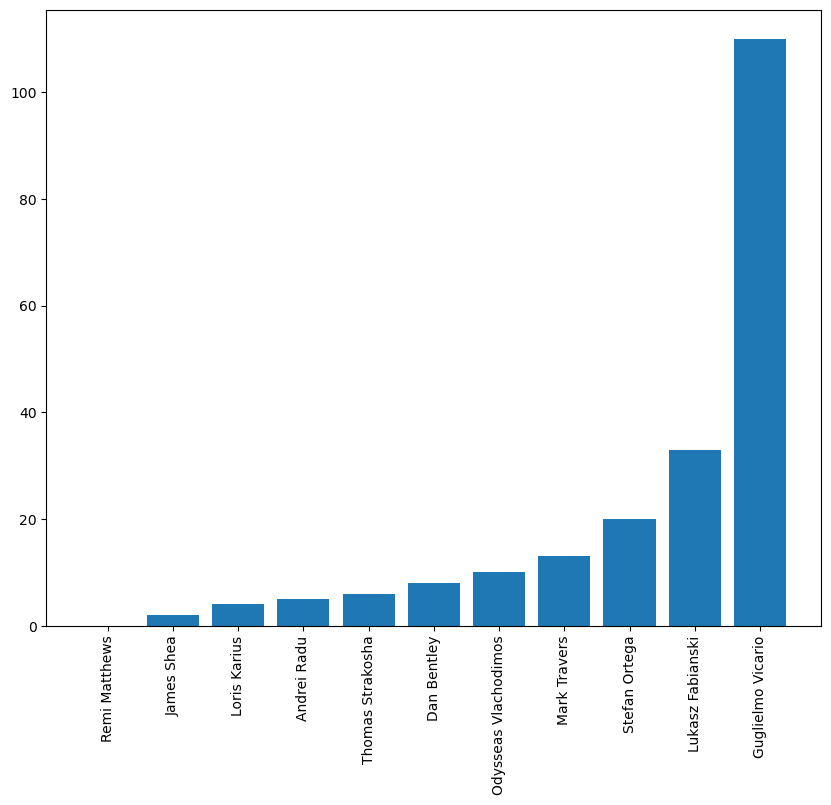

In [38]:
gks=gk.sort_values(by='Saves').copy()
plt.figure(figsize=(10,8))
plt.bar(gks['Name'],gks['Saves'])
plt.xticks(rotation=90)
plt.show()

_____________________________________________________________________________________________________________________________________________________

### In modern football, goalkeepers are also expected to have "outfield" attributes and may be asked to play as a sweeper keeper. This involves pushing higher up the pitch to assist the outfield build-up play.

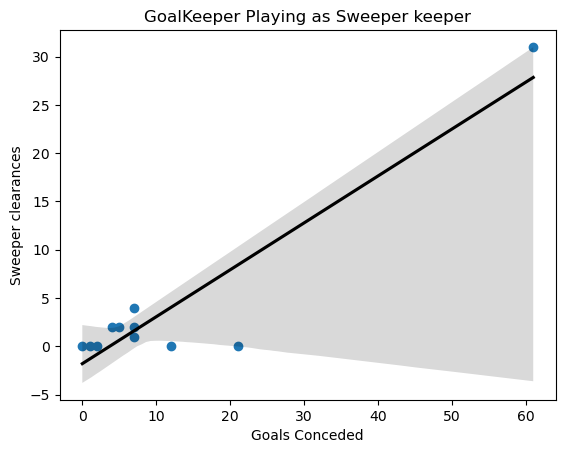

In [42]:
plt.scatter(gks['Goals Conceded'],gks['Sweeper clearances'])
sns.regplot(x='Goals Conceded',y='Sweeper clearances',data=gks,scatter=False,color='black')
plt.title('GoalKeeper Playing as Sweeper keeper')
plt.show()

**Interpretation:**
Positive Correlation: There is a positive correlation between Goals Conceded and Sweeper Clearances, as the regression line slopes upward. This means that goalkeepers who tend to concede more goals also perform more sweeper clearances.

**Scatter of Data:** The data points are somewhat spread out, especially as the number of goals conceded increases. This suggests that although the trend is positive, the relationship is not perfectly linear—goalkeepers with similar numbers of goals conceded can have very different numbers of sweeper clearances.

**Conclusion:**
Goalkeepers who have a **'Sweeper Keeper'** playstyle tend to concede more goals. We can suggest that goalkeepers avoid coming out of the box too often.

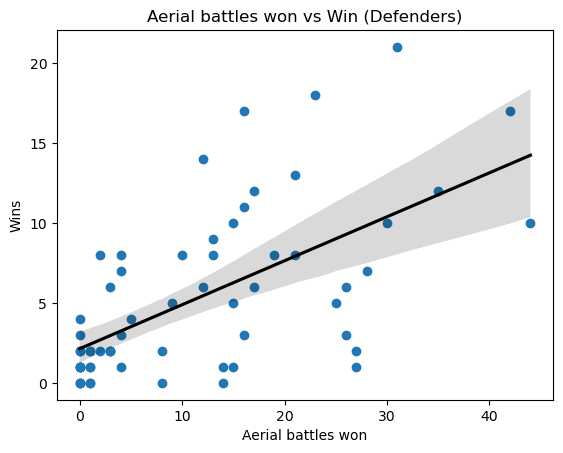

In [46]:
plt.scatter(df['Aerial battles won'],df['Wins'])
sns.regplot(x='Aerial battles won',y='Wins',data=df,scatter=False,color='black')
plt.title('Aerial battles won vs Win (Defenders)')
plt.show()

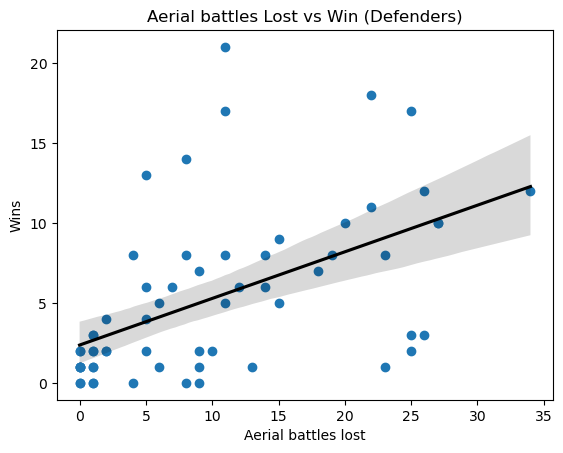

In [47]:
plt.scatter(df['Aerial battles lost'],df['Wins'])
sns.regplot(x='Aerial battles lost',y='Wins',data=df,scatter=False,color='black')
plt.title('Aerial battles Lost vs Win (Defenders)')
plt.show()

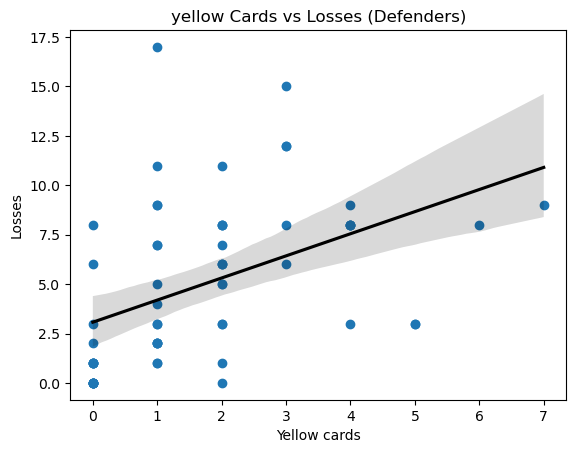

In [48]:
plt.scatter(df['Yellow cards'],df['Losses'])
sns.regplot(x='Yellow cards',y='Losses',data=df,scatter=False,color='black')
plt.title('yellow Cards vs Losses (Defenders)')
plt.show()

Key Points:
Scatter Plot: Each blue dot represents a data point for a defender, indicating how many yellow cards they received and how many games they lost.

Positive Correlation: The black line represents a linear regression, suggesting a positive correlation between yellow cards and losses. Defenders with more yellow cards tend to be associated with more losses.

Spread of Data: The shaded area around the regression line represents the confidence interval, showing the variability in the data. Although there's a positive trend, there are some outliers where defenders received many yellow cards but didn't lose many games or vice versa.

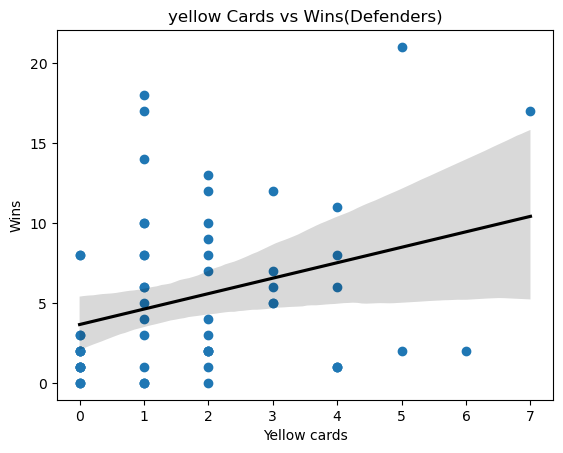

In [50]:
plt.scatter(df['Yellow cards'],df['Wins'])
sns.regplot(x='Yellow cards',y='Wins',data=df,scatter=False,color='black')
plt.title('yellow Cards vs Wins(Defenders)')
plt.show()

Weak Positive Trend: There is a slight positive correlation between yellow cards and wins, as indicated by the regression line's slight upward slope. This suggests that defenders who receive more yellow cards may be playing more aggressively, which might contribute to slightly better team performance (in terms of wins), though the effect seems minimal.

Outliers: There's a significant outlier where a defender (or defenders) with zero or very few yellow cards has contributed to a team with over 160 wins. This point is quite far from the rest of the data and is likely skewing the analysis.

Distribution: Most data points cluster near the bottom-left, indicating that the majority of defenders accumulate fewer yellow cards (0-6) and that most teams win fewer than 20 matches. As the number of yellow cards increases, the number of wins stays relatively stable, with no dramatic increase in wins beyond 6 yellow cards.

Low Impact of Yellow Cards on Wins: The flatness of the regression line shows that the number of yellow cards a defender accumulates does not significantly affect the team's success in terms of wins. It suggests that while aggressive or physical play (leading to yellow cards) might have some effect, it’s not a strong predictor of team success.

In [57]:
#dfy =  df.groupby('Yellow cards',observed=False)['Wins'].sum() 
dfy = df.groupby('Yellow cards', observed=False)[['Wins', 'Losses']].sum()
dfy.reset_index()

,Yellow cards,Wins,Losses
0,0.0,35.0,24.0
1,1.0,110.0,85.0
2,2.0,75.0,77.0
3,3.0,35.0,53.0
4,4.0,28.0,44.0
5,5.0,23.0,6.0
6,6.0,2.0,8.0
7,7.0,17.0,9.0


In [139]:
midy =  mid.groupby('Yellow cards',observed=False)[['Wins','Losses']].sum() 
midy.reset_index()

,Yellow cards,Wins,Losses
0,0.0,111.0,70.0
1,1.0,27.0,60.0
2,2.0,79.0,117.0
3,3.0,45.0,41.0
4,4.0,51.0,57.0
5,5.0,1.0,9.0
6,6.0,19.0,29.0
7,7.0,21.0,17.0
8,8.0,5.0,14.0
9,9.0,3.0,15.0


In [185]:
fwdy=fwd.groupby('Yellow cards',observed=False)[['Wins','Losses']].sum() 
fwdy.reset_index()

,Yellow cards,Wins,Losses
0,0.0,56.0,83.0
1,1.0,50.0,56.0
2,2.0,24.0,39.0
3,3.0,28.0,40.0
4,4.0,5.0,28.0
5,5.0,16.0,25.0
6,6.0,9.0,9.0


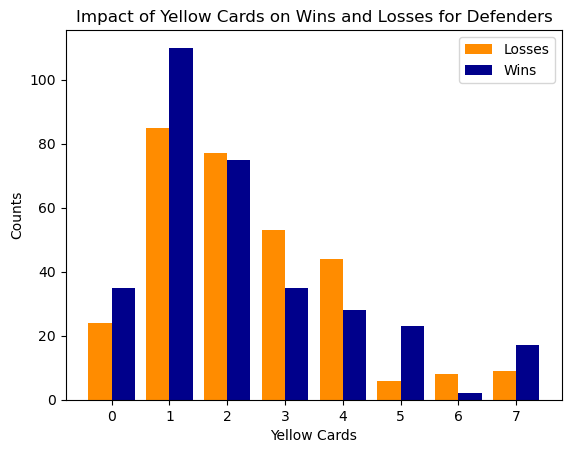

In [169]:
import matplotlib.pyplot as plt
import numpy as np

width = 0.4  # Width of the bars

fig, ax = plt.subplots()

# Create the first set of bars (Group 1)
bars1 = ax.bar(dfy.index - width/2, dfy['Losses'], width, label='Losses', color='darkorange')

# Create the second set of bars (Group 2)
bars3 = ax.bar(dfy.index + width/2, dfy['Wins'], width, label='Wins', color='darkblue')

# Labels and title
ax.set_xlabel('Yellow Cards')
ax.set_ylabel('Counts')
ax.set_title('Impact of Yellow Cards on Wins and Losses for Defenders')

# Add legend
ax.legend(loc='upper right')

plt.show()

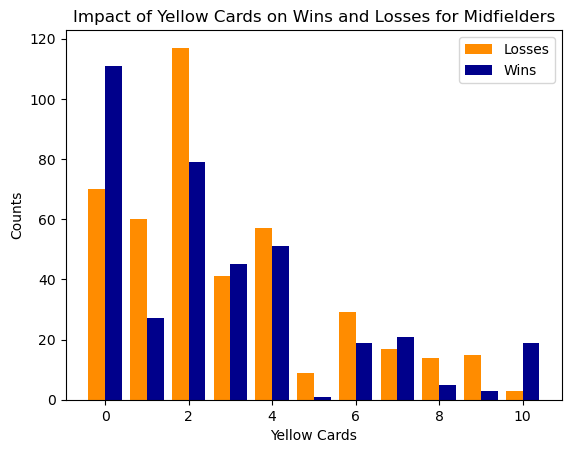

In [217]:
fig, ax= plt.subplots()

bar1=ax.bar(midy.index - width/2,midy['Losses'],width,color='darkorange',label='Losses')
bar2=ax.bar(midy.index + width/2,midy['Wins'],width,color='darkblue',label='Wins')
ax.set_xlabel('Yellow Cards')
ax.set_ylabel('Counts')
ax.set_title('Impact of Yellow Cards on Wins and Losses for Midfielders')
plt.legend()

plt.show()

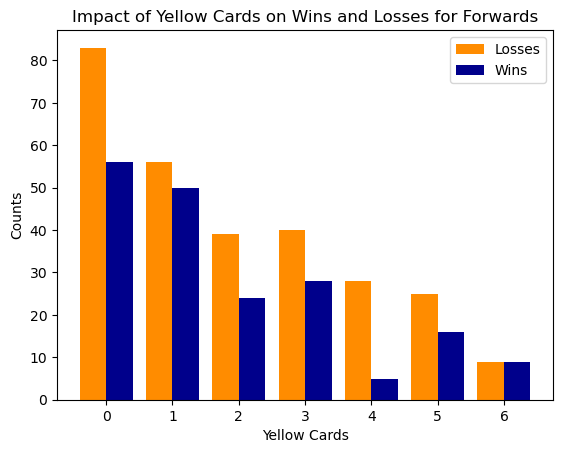

In [211]:
fig, ax=plt.subplots()

width=0.4

b1=ax.bar(fwdy.index - width/2,fwdy['Losses'],width,label='Losses',color='darkorange')
b1=ax.bar(fwdy.index + width/2,fwdy['Wins'],width,label='Wins',color='darkblue')
ax.set_xlabel('Yellow Cards')
ax.set_ylabel('Counts')
ax.set_title('Impact of Yellow Cards on Wins and Losses for Forwards')

plt.legend()
plt.show()

* #### Defenders
 ***Observation:***
The highest counts of losses occur when defenders receive 1 yellow card.
Wins are higher than losses when defenders receive 0 yellow cards.
As the number of yellow cards increases (up to 7), losses tend to dominate except for cases with 0 cards, where wins outnumber losses.

***Interpretation:***
Defenders receiving fewer or no yellow cards correlate with higher chances of winning.
Receiving even 1 yellow card increases the probability of a loss.

* #### Midfielders
 ***Observation:***
For midfielders, losses are highest when they receive 2 yellow cards.
The number of 0 yellow cards sees more wins than losses.
Losses dominate significantly as yellow card counts increase, with minimal wins for 6+ yellow cards.

***Interpretation:***
Like defenders, fewer yellow cards for midfielders correlate with better outcomes for the team.
A sharp increase in losses is seen with 2 or more yellow cards.

* #### Forwards
 ***Observation:***
Forwards with 0 yellow cards show a much higher number of losses compared to wins.
Forwards with 1 yellow card have similar counts of wins and losses.
Beyond 2 yellow cards, losses dominate, but the number of yellow cards decreases progressively.

***Interpretation:***
The relationship for forwards is slightly different compared to defenders and midfielders. While receiving 1 yellow card doesn’t seem as detrimental, higher counts of yellow cards lead to increased losses.

In [279]:
#dfy =  df.groupby('Yellow cards',observed=False)['Wins'].sum() 
dfc = df.groupby('Yellow cards', observed=False)[['Wins', 'Losses','Goals Conceded','Appearances']].sum()

dfc.reset_index()


,Yellow cards,Wins,Losses,Goals Conceded,Appearances
0,0.0,35.0,24.0,49.0,71.0
1,1.0,110.0,85.0,242.0,237.0
2,2.0,75.0,77.0,218.0,191.0
3,3.0,35.0,53.0,155.0,112.0
4,4.0,28.0,44.0,146.0,102.0
5,5.0,23.0,6.0,31.0,41.0
6,6.0,2.0,8.0,28.0,16.0
7,7.0,17.0,9.0,41.0,33.0


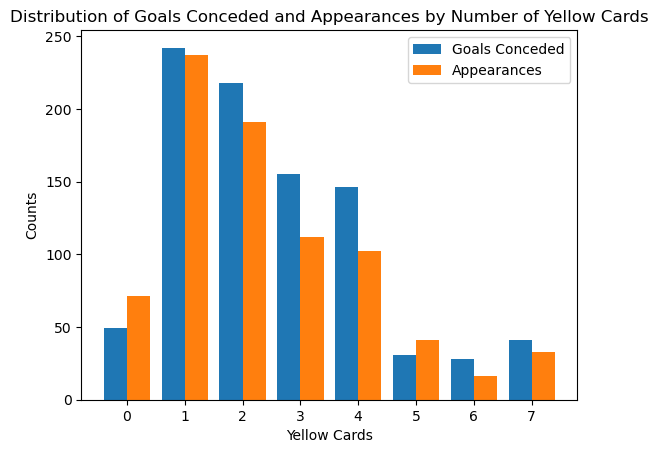

In [281]:
fig,ax=plt.subplots()
width=0.4

b1=ax.bar(dfc.index-width/2,dfc['Goals Conceded'],width,label='Goals Conceded')
b2=ax.bar(dfc.index+width/2,dfc['Appearances'],width,label='Appearances')
ax.set_xlabel('Yellow Cards')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Goals Conceded and Appearances by Number of Yellow Cards')
plt.legend()
plt.show()

**Interpretation :**
* Aggressive play (as indicated by receiving more yellow cards) seems to have a negative impact on a team's defensive performance, leading to more goals conceded.
  
**Players with more yellow cards tend to concede more goals, which might be due to:**
 - Defensive lapses after fouling.
 - Giving away free kicks or penalties.
 - Potential suspensions or reduced game time for players accumulating too many yellow cards.

In [ ]:
#df=aps[aps['Position']=='Defender']
#mid=aps[aps['Position']=='Midfielder']
#fwd=aps[aps['Position']=='Forward']
#gk=aps[aps['Position']=='Goalkeeper']